In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op
import emcee

In [51]:
def lnlike(theta, x, y, yerr):
    m, b, pb, yb, vb = theta
    model = m * x + b
    inv_sigma = 1.0/(yerr**2)
    model2 = yb
    inv_sigma2 = 1.0/(yerr**2+vb)
    return np.sum(np.log((1-pb)/yerr*np.exp(-(y-model)**2*inv_sigma/2.)+ \
               +pb*np.sqrt(inv_sigma2)*np.exp(-(y-model2)**2*inv_sigma2/2.)))

def lnprior(theta):
    m, b, pb, yb, vb = theta
    if 0.<m<5. and -100.<b<300. and 1E-5<pb<1.-1E-5 \
       and 100.<yb<1000. and 1.<vb<400.:
        return 0.0
    return -np.inf
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [52]:
x = np.array([201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146])
y = np.array([592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344])
yerr = np.array([61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22])
xerr = np.array([9,4,11,7,5,9,4,4,11,7,5,5,5,6,6,5,9,8,6,5])
xy_cov = np.array([-0.84,0.31,0.64,-0.27,-0.33,0.67,-0.02,-0.05,-0.84,-0.69,0.30,-0.46,-0.03,0.50,0.73,-0.52,0.90,0.40,-0.78,-0.56])

In [70]:
# m0, b0, pb0, yb0, vb0 = 22., 32., 0.2, 100., 50.
theta0 = np.array([2.2, 34., 0.2, 300., 50.])
ndim = 5
nwalkers = 100
pos = [theta0 + 1e-2*np.random.randn(ndim) for i in range(nwalkers)]

In [71]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))

In [72]:
tmp = sampler.run_mcmc(pos, 500)

In [75]:
samples = sampler.chain[:,100:,:].reshape((-1, ndim))

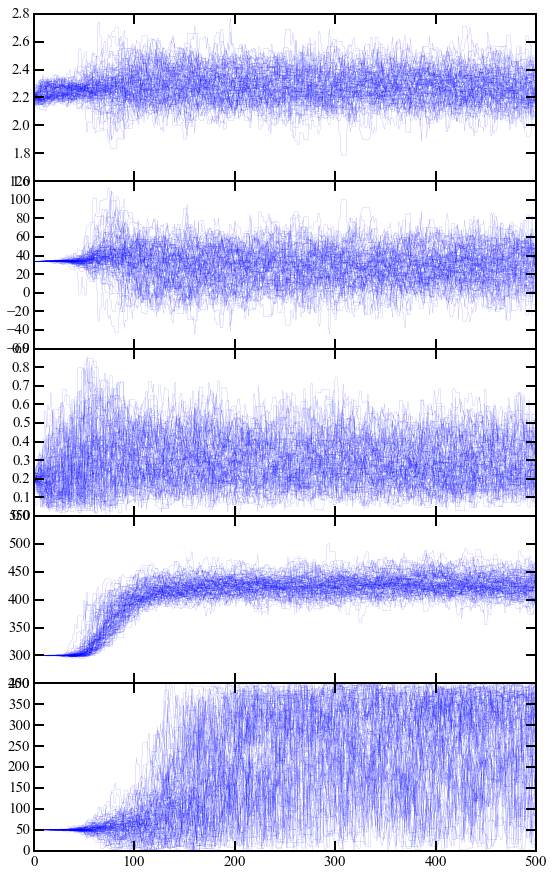

In [73]:
fig, axes = plt.subplots(5, 1, figsize=(9,15))
fig.subplots_adjust(hspace=0)
#for i, par in zip(np.arange(3), [m_true, b_true, f_true]):
for i, ax in zip(np.arange(5), axes):
    for j in np.arange(100):
        ax.plot(sampler.chain[j,:,i], 'b', linewidth=0.1)
    #ax.plot([0,5E2], [par, par], 'r', linewidth=3)
for ax in axes[:-1]: 
    #ax.get_xaxis().set_visible(False)
    ax.set_xticklabels([])

<Container object of 3 artists>

/Users/Benjamin/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


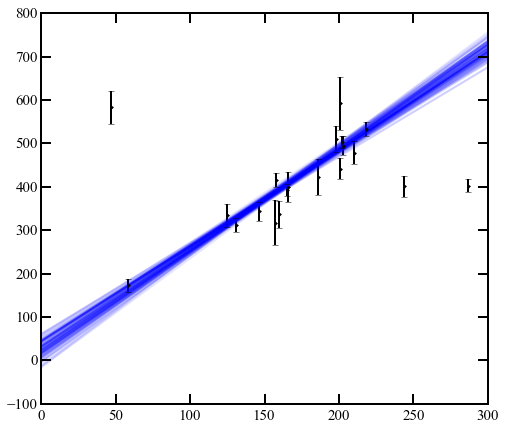

In [79]:
fig, ax = plt.subplots(1,1,figsize=(8,7))
xl = np.array([0, 300])
for m, b, pb, yb, vb in samples[np.random.randint(len(samples), size=100)]:
    ax.plot(xl, m*xl+b, color="b", alpha=0.1)
#ax.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
ax.errorbar(x, y, yerr=yerr, fmt=".k")

In [65]:
samples[0].shape

(100, 5)

In [66]:
sampler.chain.shape

(100, 500, 5)

In [119]:
n_gauss = 4
mu = np.linspace(20,300,n_gauss)
sigma = 50.
A = np.zeros((x.size,n_gauss+1))
A[:,0] = 1.
for i in np.arange(n_gauss):
    A[:,i+1] = np.exp(-np.square((x-mu[i])/sigma)/2.)/np.sqrt(2.*np.pi)/sigma
C = np.diag(yerr**2)

x_sim = np.linspace(0,300,100)
A_sim = np.zeros((x_sim.size,n_gauss+1))
A_sim[:,0] = 1.
for i in np.arange(n_gauss):
    A_sim[:,i+1] = np.exp(-np.square((x_sim-mu[i])/sigma)/2.)/np.sqrt(2.*np.pi)/sigma

In [120]:
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
coeffs = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

In [121]:
np.dot(A_sim, coeffs).shape, x_sim.shape

((100,), (100,))

<Container object of 3 artists>

/Users/Benjamin/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


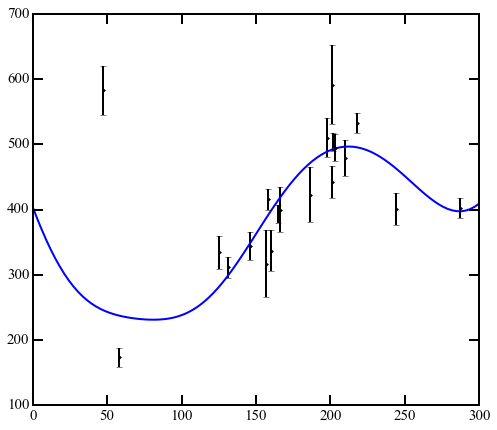

In [123]:
fig, ax = plt.subplots(1,1,figsize=(8,7))
ax.plot(x_sim, np.dot(A_sim, coeffs.reshape(5,1)))
#ax.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
ax.errorbar(x, y, yerr=yerr, fmt=".k")

In [93]:
np.linspace(0,300,100)

array([   0.        ,    3.03030303,    6.06060606,    9.09090909,
         12.12121212,   15.15151515,   18.18181818,   21.21212121,
         24.24242424,   27.27272727,   30.3030303 ,   33.33333333,
         36.36363636,   39.39393939,   42.42424242,   45.45454545,
         48.48484848,   51.51515152,   54.54545455,   57.57575758,
         60.60606061,   63.63636364,   66.66666667,   69.6969697 ,
         72.72727273,   75.75757576,   78.78787879,   81.81818182,
         84.84848485,   87.87878788,   90.90909091,   93.93939394,
         96.96969697,  100.        ,  103.03030303,  106.06060606,
        109.09090909,  112.12121212,  115.15151515,  118.18181818,
        121.21212121,  124.24242424,  127.27272727,  130.3030303 ,
        133.33333333,  136.36363636,  139.39393939,  142.42424242,
        145.45454545,  148.48484848,  151.51515152,  154.54545455,
        157.57575758,  160.60606061,  163.63636364,  166.66666667,
        169.6969697 ,  172.72727273,  175.75757576,  178.78787

In [113]:
mu

array([  50.,  150.,  250.])